# Training Flux Dev with LoRA on a Character

This tutorial explains how to train a Flux dev model with LoRA on a character using the following URLs:

- https://replicate.com/fofr/consistent-character - Create images of a given character in different poses
- https://replicate.com/flux-kontext-apps/portrait-series?prediction=htk5f6hr2drm80cq4vra2q7fb4 - better but pricier - New!
- https://replicate.com/ostris/flux-dev-lora-trainer/train - Fine-tune FLUX.1 on Replicate by uploading images
- https://replicate.com/replicate/fast-flux-trainer/train - New!


## Step 1: Generate Images of a Character

The first step is to generate images of the character you want to train the LoRA model on. You can use the [consistent-character](https://replicate.com/fofr/consistent-character) model on Replicate to do this.

1. Go to the [consistent-character](https://replicate.com/fofr/consistent-character) model page on Replicate.
2. Upload a face image of the character you want to generate images of.
3. Enter a prompt that describe the subject. Include clothes and hairstyle for more consistency.
4. Click the "Run" button to generate the image.
5. Repeat steps 3 and 4 to generate multiple images of the character in different poses.
6. Download the generated images and save them to the `images/character_images` directory.

<img src="../images/character_images/photo_1.jpg" style="weight:256px;height:256px">
<img src="../images/character_images/photo_2.jpg" style="weight:256px;height:256px">
<img src="../images/character_images/photo_3.jpg" style="weight:256px;height:256px">
<img src="../images/character_images/photo_4.jpg" style="weight:256px;height:256px">
<img src="../images/character_images/photo_5.jpg" style="weight:256px;height:256px">
<img src="../images/character_images/photo_6.jpg" style="weight:256px;height:256px">

## Step 2: Train a LoRA Model on the Generated Images

The next step is to train a LoRA model on the generated images. You can use the [flux-dev-lora-trainer](https://replicate.com/ostris/flux-dev-lora-trainer/train) model on Replicate to do this.

1. Go to the [flux-dev-lora-trainer](https://replicate.com/ostris/flux-dev-lora-trainer/train) model page on Replicate.
2. Select a model as your destination or create a new one by typing the name in the model selector field.
3. Upload the zip file containing your training data as the `input_images`. You will need to zip the `images/character_images` directory.
4. Set up the training parameters.
5. Click “Create training” to begin the process of fine-tuning.

## Conclusion

By following these steps, you can train a Flux dev model with LoRA on a character using the [consistent-character](https://replicate.com/fofr/consistent-character) and [flux-dev-lora-trainer](https://replicate.com/ostris/flux-dev-lora-trainer/train) models on Replicate.

## Generate an image using the LoRA model

In [1]:
import replicate
import os
from dotenv import load_dotenv
import requests
import time
from IPython.display import Image, display # To display images in the notebook

# Load environment variables from .env file (searches current dir and parents)
load_dotenv()

api_token = os.getenv("REPLICATE_API_KEY")
os.environ["REPLICATE_API_TOKEN"] = api_token

if not api_token:
    print("⚠️ Warning: REPLICATE_API_TOKEN not found.")
    print("   Please ensure a .env file exists in the project root directory")
    print("   with the line: REPLICATE_API_TOKEN=your_actual_token")
else:
    print("✅ Replicate API Token loaded successfully.")

✅ Replicate API Token loaded successfully.


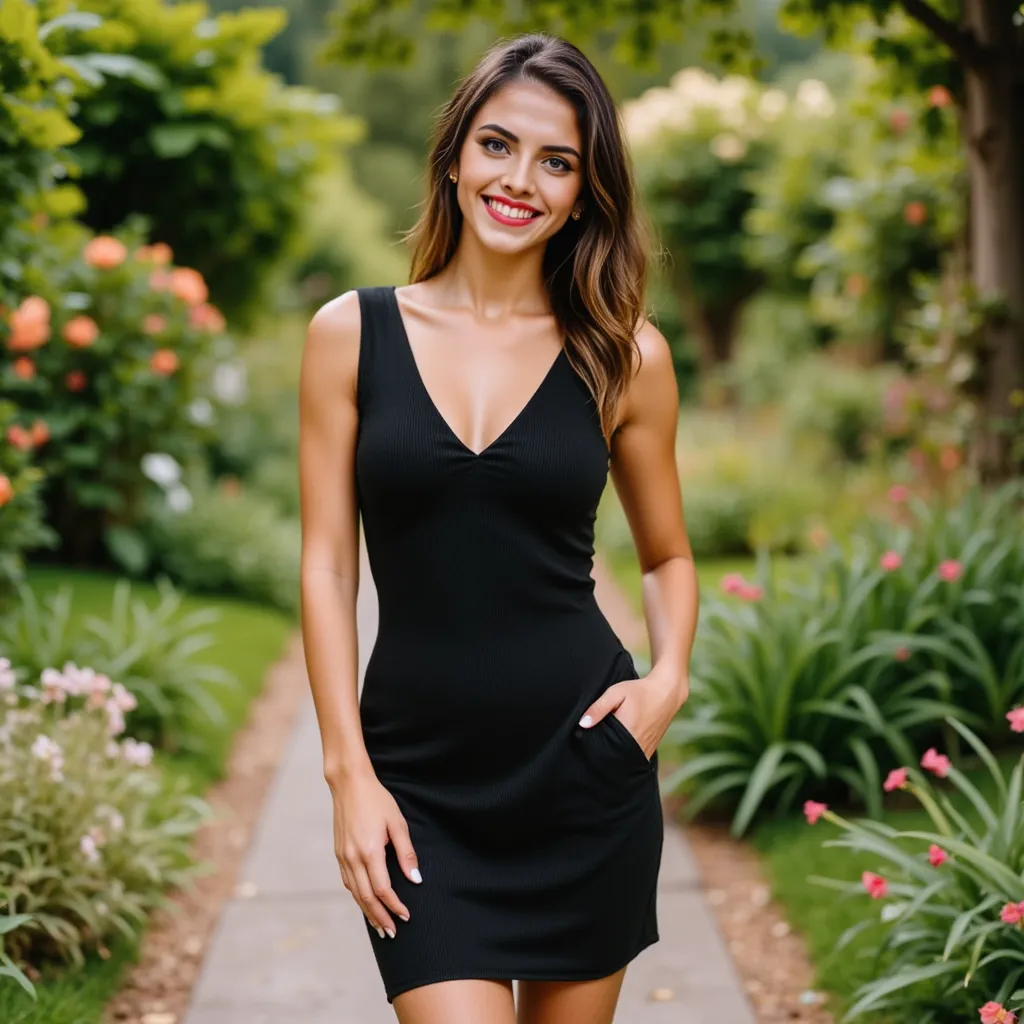

In [5]:
output = replicate.run(
    "eyalrr/shontal:2dd16e0cdc277ca2e971a5cb938ba788b4533f1504155a94a12f1b7c4f71d326",
    input={
        "model": "dev",
        "prompt": "TOK woman in a black dress, standing in a garden, looking at the camera",
        "go_fast": False,
        "lora_scale": 1,
        "megapixels": "1",
        "num_outputs": 1,
        "aspect_ratio": "1:1",
        "output_format": "webp",
        "guidance_scale": 3,
        "output_quality": 80,
        "prompt_strength": 0.8,
        "extra_lora_scale": 1,
        "num_inference_steps": 28
    }
)

for index, item in enumerate(output):
    with open(f"../images/shontal_{index}.webp", "wb") as file:
        file.write(item.read())
display(Image(filename='../images/shontal_0.webp'))
